In [339]:
import pandas as pd
import matplotlib.pyplot as plt

import pyarrow.parquet as pq
import numpy as np

data = pd.read_csv('/Users/Boaz/Documents/DataMining/dataset_mood_smartphone.csv')


In [340]:
df = pd.DataFrame(data)

In [341]:
del df['Unnamed: 0']

In [342]:
df['variable'].unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [343]:
vl = []
for v in df['variable'].unique():
    vl.append(len(df['variable'] == v))
vl

vl = []
for v in df['variable'].unique():
    vl.append(df[df['variable'] == v]['value'].isna().sum())
vl

vl = []
for v in df['variable'].unique():
    vl.append((df[df['variable'] == v]['value'].min(),df[df['variable'] == v]['value'].max()))
vl

[(1.0, 10.0),
 (-2.0, 2.0),
 (-2.0, 2.0),
 (0.0, 1.0),
 (0.0350000858306885, 9867.00699996948),
 (1.0, 1.0),
 (1.0, 1.0),
 (-82798.871, 33960.246),
 (0.006, 9830.777),
 (-0.011000000000000001, 32148.677000000003),
 (0.131, 355.51300000000003),
 (1.003, 5491.793000000001),
 (0.003, 32708.818),
 (0.013999999999999999, 3892.038),
 (0.094, 30000.906000000003),
 (0.08, 10452.615),
 (0.111, 2239.937),
 (0.24600000000000002, 1802.649),
 (1.003, 344.86300000000006)]

# Check and drop NaN values rows

In [344]:
df.isna().sum().sum()

202

In [345]:
#FIND NAN VALUES AND THEIR INDEX 
count_nan = df['value'].isnull()
nan_index = []
for i in range(len(count_nan)):
    if count_nan[i] == True:
        nan_index.append(i)
nan_index

[5708,
 5730,
 5772,
 5796,
 5835,
 6324,
 6378,
 6433,
 6667,
 6792,
 7036,
 7255,
 7261,
 7319,
 7347,
 7449,
 8192,
 8201,
 8349,
 8356,
 8361,
 8382,
 8403,
 8460,
 8466,
 8642,
 9331,
 9389,
 9393,
 9398,
 9442,
 9477,
 9502,
 9518,
 9645,
 9918,
 10188,
 10240,
 10247,
 10261,
 10282,
 10291,
 10292,
 10328,
 10333,
 11255,
 11299,
 11351,
 11378,
 11379,
 11381,
 11414,
 11415,
 11418,
 11478,
 11479,
 11487,
 11496,
 11967,
 12021,
 12066,
 12076,
 12310,
 12323,
 12435,
 12679,
 12773,
 12898,
 12923,
 13036,
 13046,
 13050,
 13051,
 13060,
 13178,
 13182,
 13186,
 13202,
 13748,
 13798,
 13819,
 13822,
 13825,
 13842,
 13844,
 13852,
 13859,
 13886,
 13896,
 13927,
 13944,
 13958,
 13960,
 13964,
 13973,
 13976,
 13991,
 13992,
 13999,
 14002,
 14007,
 14018,
 14021,
 14025,
 14027,
 14034,
 14037,
 14043,
 14046,
 14053,
 14054,
 14055,
 14062,
 14069,
 14070,
 14084,
 14088,
 14096,
 14100,
 14103,
 14104,
 14105,
 14109,
 14112,
 14285,
 14311,
 14312,
 14314,
 14323,
 143

In [346]:
for nan in nan_index:
    before = df['value'][nan-1]
    after = df['value'][nan+1]
    value = (df['value'][nan-2],df['value'][nan-1],df['value'][nan-1],df['value'][nan+2])
    value_nan = round(np.mean([x for x in value if (x == 1) | (x == -1) | (x== 0)| (x== 2)| (x== -2)]))
    df.loc[nan,'value'] = value_nan

## Make variables as columns

In [351]:
data_mood_only = df[df["variable"] == 'mood']
data_mood_only = data_mood_only.rename(columns={'value': 'mood'})
# data_mood_only

In [352]:
circumplex_arousal_only = df[df["variable"] == 'circumplex.arousal']
circumplex_arousal_only = circumplex_arousal_only.rename(columns={'value': 'circumplex.arousal'})
# circumplex_arousal_only

In [353]:
circumplex_valence_only = df[df["variable"] == 'circumplex.valence']
circumplex_valence_only = circumplex_valence_only.rename(columns={'value': 'circumplex.valence'})
#circumplex_valence_only

In [354]:
activity = df[df["variable"] == 'activity']
activity = activity.rename(columns={'value': 'activity'})
#activity

In [355]:
screen = df[df["variable"] == 'screen']
screen = screen.rename(columns={'value': 'screen'})
#screen

In [356]:
sms = df[df["variable"] == 'sms']
sms = sms.rename(columns={'value': 'sms'})
#sms

In [357]:
appCat_builtin = df[df["variable"] == 'appCat.builtin']
appCat_builtin = appCat_builtin.rename(columns={'value': 'appCat.builtin'})
#appCat_builtin

In [358]:
appCat_communication = df[df["variable"] == 'appCat.communication']
appCat_communication = appCat_communication.rename(columns={'value': 'appCat.communication'})
#appCat_communication

In [359]:
appCat_entertainment = df[df["variable"] == 'appCat.entertainment']
appCat_entertainment = appCat_entertainment.rename(columns={'value': 'appCat.entertainment'})
#appCat_entertainment

In [360]:
appCat_finance = df[df["variable"] == 'appCat.finance']
appCat_finance = appCat_finance.rename(columns={'value': 'appCat.finance'})
#appCat_finance

In [361]:

appCat_game = df[df["variable"] == 'appCat.game']
appCat_game = appCat_game.rename(columns={'value': 'appCat.game'})
#appCat_game

In [362]:
appCat_office = df[df["variable"] == 'appCat.office']
appCat_office = appCat_office.rename(columns={'value': 'appCat.office'})
#appCat_office

In [363]:
appCat_other = df[df["variable"] == 'appCat.other']
appCat_other = appCat_other.rename(columns={'value': 'appCat.other'})
#appCat_other

In [364]:
appCat_social = df[df["variable"] == 'appCat.social']
appCat_social = appCat_social.rename(columns={'value': 'appCat.social'})
#appCat_social

In [365]:
appCat_travel = df[df["variable"] == 'appCat.travel']
appCat_travel = appCat_travel.rename(columns={'value': 'appCat.travel'})
#appCat_travel

In [366]:
appCat_unknown = df[df["variable"] == 'appCat.unknown']
appCat_unknown = appCat_unknown.rename(columns={'value': 'appCat.unknown'})
#appCat_unknown

In [367]:
appCat_utilities = df[df["variable"] == 'appCat.utilities']
appCat_utilities = appCat_utilities.rename(columns={'value': 'appCat.utilities'})
#appCat_utilities

In [368]:
appCat_weather = df[df["variable"] == 'appCat.weather']
appCat_weather = appCat_weather.rename(columns={'value': 'appCat.weather'})


In [369]:
df['mood'] = data_mood_only['mood']
df['circumplex.arousal'] = circumplex_arousal_only['circumplex.arousal']
df['circumplex.valence'] = circumplex_valence_only['circumplex.valence']
df['activity'] = activity['activity']
df['screen'] = screen['screen']
df['sms'] = sms['sms']
df['appCat.builtin'] = appCat_builtin['appCat.builtin']
df['appCat.communication'] = appCat_communication['appCat.communication']
df['appCat.entertainment'] = appCat_entertainment['appCat.entertainment']
df['appCat.finance'] = appCat_finance['appCat.finance']
df['appCat.game'] = appCat_game['appCat.game']
df['appCat.office'] = appCat_office['appCat.office']
df['appCat.other'] = appCat_other['appCat.other']
df['appCat.social'] = appCat_social['appCat.social']
df['appCat.travel'] = appCat_travel['appCat.travel']
df['appCat.unknown'] = appCat_unknown['appCat.unknown']
df['appCat.utilities'] = appCat_utilities['appCat.utilities']
df['appCat.weather'] = appCat_weather['appCat.weather']
df

,id,time,variable,value,mood,circumplex.arousal,circumplex.valence,activity,screen,sms,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.033


In [ ]:
# compression_opts = dict(method='zip',
#                         archive_name='dataset_columns.csv')  
# df.to_csv('dataset_columns.zip', index=False,
#           compression=compression_opts)

## Checking for anomlies

<function matplotlib.pyplot.show(*args, **kw)>

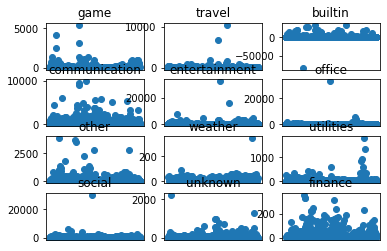

In [370]:

plt.subplot(4, 3, 1)
plt.scatter(range(len(df['appCat.game'])), df['appCat.game'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('game')
plt.plot

plt.subplot(4, 3, 2)
plt.scatter(range(len(df['appCat.travel'])), df['appCat.travel'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('travel')
plt.plot

plt.subplot(4, 3, 3)
plt.scatter(range(len(df['appCat.builtin'])), df['appCat.builtin'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('builtin')
plt.plot

plt.subplot(4, 3, 4)
plt.scatter(range(len(df['appCat.communication'])), df['appCat.communication'])
plt.title('communication')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 5)
plt.scatter(range(len(df['appCat.entertainment'])), df['appCat.entertainment'])
plt.title('entertainment')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 6)
plt.scatter(range(len(df['appCat.office'])), df['appCat.office'])
plt.title('office')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 7)
plt.scatter(range(len(df['appCat.other'])), df['appCat.other'])
plt.title('other')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 8)
plt.scatter(range(len(df['appCat.weather'])), df['appCat.weather'])
plt.title('weather')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 9)
plt.scatter(range(len(df['appCat.utilities'])), df['appCat.utilities'])
plt.title('utilities')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 10)
plt.scatter(range(len(df['appCat.social'])), df['appCat.social'])
plt.title('social')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3,11)
plt.scatter(range(len(df['appCat.unknown'])), df['appCat.unknown'])
plt.title('unknown')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 12)
plt.scatter(range(len(df['appCat.finance'])), df['appCat.finance'])
plt.title('finance')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.show

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

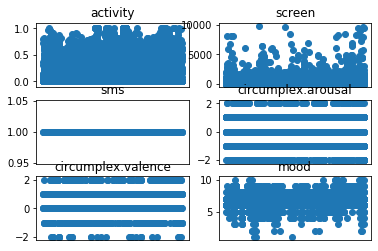

In [371]:
plt.subplot(3, 2, 1)
plt.scatter(range(len(df['activity'])), df['activity'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('activity')
plt.plot

plt.subplot(3, 2, 2)
plt.scatter(range(len(df['screen'])), df['screen'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('screen')
plt.plot

plt.subplot(3, 2, 3)
plt.scatter(range(len(df['sms'])), df['sms'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('sms')
plt.plot

plt.subplot(3, 2, 4)
plt.scatter(range(len(df['circumplex.arousal'])), df['circumplex.arousal'])
plt.title('circumplex.arousal')
ax = plt.gca()
ax.get_xaxis().set_visible(False)


plt.subplot(3, 2, 5)
plt.scatter(range(len(df['circumplex.valence'])), df['circumplex.valence'])
plt.title('circumplex.valence')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(3, 2, 6)
plt.scatter(range(len(df['mood'])), df['mood'])
plt.title('mood')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot



# Handeling anomalies

In [372]:

df.loc[df['appCat.game']> 2500, 'appCat.game'] = np.mean(df['appCat.game'])
df.loc[df['appCat.travel']> 1200, 'appCat.travel'] = np.mean(df['appCat.travel'])
df.loc[df['appCat.builtin']< 0, 'appCat.builtin'] = 0
df.loc[df['appCat.builtin']> 20000, 'appCat.builtin'] = np.mean(df['appCat.builtin'])

df.loc[df['appCat.communication']>6500, 'appCat.communication'] =  np.mean(df['appCat.communication'])
df.loc[df['appCat.entertainment']>6500, 'appCat.entertainment'] =  np.mean(df['appCat.entertainment'])
df.loc[df['appCat.office']>3500, 'appCat.office'] =  np.mean(df['appCat.office'])
df.loc[df['appCat.other']>1200, 'appCat.other'] =  np.mean(df['appCat.other'])
df.loc[df['appCat.weather']>70, 'appCat.weather'] =  np.mean(df['appCat.weather'])
df.loc[df['appCat.utilities']>250, 'appCat.utilities'] =  np.mean(df['appCat.utilities'])
df.loc[df['appCat.social']> 3500, 'appCat.social'] =  np.mean(df['appCat.social'])
df.loc[df['appCat.unknown']> 700, 'appCat.unknown'] =  np.mean(df['appCat.unknown'])
df.loc[df['appCat.finance']> 320, 'appCat.finance'] =  np.mean(df['appCat.finance'])

# Checking with count what good border is for outlier, with help of the figures above 
# Eg:
#df[df['appCat.other']> 1200].count()

<function matplotlib.pyplot.show(*args, **kw)>

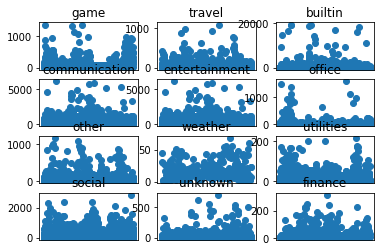

In [373]:
plt.subplot(4, 3, 1)
plt.scatter(range(len(df['appCat.game'])), df['appCat.game'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('game')
plt.plot

plt.subplot(4, 3, 2)
plt.scatter(range(len(df['appCat.travel'])), df['appCat.travel'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('travel')
plt.plot

plt.subplot(4, 3, 3)
plt.scatter(range(len(df['appCat.builtin'])), df['appCat.builtin'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title('builtin')
plt.plot

plt.subplot(4, 3, 4)
plt.scatter(range(len(df['appCat.communication'])), df['appCat.communication'])
plt.title('communication')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 5)
plt.scatter(range(len(df['appCat.entertainment'])), df['appCat.communication'])
plt.title('entertainment')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 6)
plt.scatter(range(len(df['appCat.office'])), df['appCat.office'])
plt.title('office')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 7)
plt.scatter(range(len(df['appCat.other'])), df['appCat.other'])
plt.title('other')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 8)
plt.scatter(range(len(df['appCat.weather'])), df['appCat.weather'])
plt.title('weather')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 9)
plt.scatter(range(len(df['appCat.utilities'])), df['appCat.utilities'])
plt.title('utilities')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 10)
plt.scatter(range(len(df['appCat.social'])), df['appCat.social'])
plt.title('social')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3,11)
plt.scatter(range(len(df['appCat.unknown'])), df['appCat.unknown'])
plt.title('unknown')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.subplot(4, 3, 12)
plt.scatter(range(len(df['appCat.finance'])), df['appCat.finance'])
plt.title('finance')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot

plt.show

# Aggregate Time , how to handle the different variables?

In [374]:
d = {}
ids = df['id'].unique()
for id in ids:
    data_per_id = df.loc[(df['id'] == id)]
    ## Set timestamp to 24 hour
    data_per_id_time = data_per_id.set_index(['time'])
    data_per_id_time.index = pd.to_datetime(data_per_id_time.index)
    # Get the values for each variable
    # Mean of in range values
    mood_agg = data_per_id_time.resample('24H').agg({'mood': 'mean'})
    arousal_agg = data_per_id_time.resample('24H').agg({'circumplex.arousal': 'mean'})
    valence_agg = data_per_id_time.resample('24H').agg({'circumplex.valence': 'mean'})
    ## Sum duration of each activity 
    activity_agg = data_per_id_time.resample('24H').agg({'activity': 'sum'})
    screen_agg = data_per_id_time.resample('24H').agg({'screen': 'sum'})
    sms_agg = data_per_id_time.resample('24H').agg({'sms': 'sum'})
    builtin_agg = data_per_id_time.resample('24H').agg({'appCat.builtin': 'sum'})
    communication_agg = data_per_id_time.resample('24H').agg({'appCat.communication': 'sum'})
    entertainment_agg = data_per_id_time.resample('24H').agg({'appCat.entertainment': 'sum'})
    finance_agg = data_per_id_time.resample('24H').agg({'appCat.finance': 'sum'})
    game_agg = data_per_id_time.resample('24H').agg({'appCat.game': 'sum'})
    office_agg = data_per_id_time.resample('24H').agg({'appCat.office': 'sum'})
    other_agg = data_per_id_time.resample('24H').agg({'appCat.other': 'sum'})
    social_agg = data_per_id_time.resample('24H').agg({'appCat.social': 'sum'})
    travel_agg = data_per_id_time.resample('24H').agg({'appCat.travel': 'sum'})
    unknown_agg = data_per_id_time.resample('24H').agg({'appCat.unknown': 'sum'})
    utilities_agg = data_per_id_time.resample('24H').agg({'appCat.utilities': 'sum'})
    weather_agg = data_per_id_time.resample('24H').agg({'appCat.weather': 'sum'})
    # create dataframe for each user!
    new_data = pd.DataFrame()
    new_data['id'] = [id]*len(mood_agg.index.values.flatten())
    new_data['time'] = mood_agg.index
    new_data['days'] = [i for i in range(len(mood_agg.index.values.flatten()))]
    new_data['mood'] = mood_agg.values.flatten()
    new_data['circumplex.arousal'] = arousal_agg.values.flatten()
    new_data['circumplex.valence'] = valence_agg.values.flatten()
    new_data['activity'] = activity_agg.values.flatten()
    new_data['screen'] = screen_agg.values.flatten()
    new_data['sms'] = sms_agg.values.flatten()
    new_data['appCat.builtin'] = builtin_agg.values.flatten()
    new_data['appCat.communication'] = communication_agg.values.flatten()
    new_data['appCat.entertainment'] = entertainment_agg.values.flatten()
    new_data['appCat.finance'] = finance_agg.values.flatten()
    new_data['appCat.game'] = game_agg.values.flatten()
    new_data['appCat.office'] = office_agg.values.flatten()
    new_data['appCat.other'] = other_agg.values.flatten()
    new_data['appCat.social'] = social_agg.values.flatten()
    new_data['appCat.travel'] = travel_agg.values.flatten()
    new_data['appCat.unknown'] = unknown_agg.values.flatten()
    new_data['appCat.utilities'] = utilities_agg.values.flatten()
    new_data['appCat.weather'] = weather_agg.values.flatten()
    ##
    d["user{0}".format(id)] = new_data

## As you can see below, the start time is 17-02-2014 but there is only sms information, we should only use the rows with mood values because we want to predict the mood!

In [375]:
d['userAS14.01']

,id,time,days,mood,circumplex.arousal,circumplex.valence,activity,screen,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-17,0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000,...,0.000,0.000000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,AS14.01,2014-02-18,1,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000,...,0.000,0.000000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2,AS14.01,2014-02-19,2,NaN,NaN,NaN,0.000000,0.000000,2.0,0.000,...,0.000,0.000000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
3,AS14.01,2014-02-20,3,NaN,NaN,NaN,0.000000,0.000000,3.0,0.000,...,0.000,0.000000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4,AS14.01,2014-02-21,4,NaN,NaN,NaN,0.000000,0.000000,1.0,0.000,...,0.000,0.000000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,AS14.01,2014-05-01,73,8.0,-0.4,1.0,0.889566,15516.951998,4.0,1876.113,...,470.866,1015.915251,0.0,28.098,44.430,4918.942,0.000,0.000,269.569,0.0
74,AS14.01,2014-05-02,74,7.6,-0.2,1.0,1.856184,15088.519001,0.0,795.436,...,352.888,1069.748000,0.0,0.000,32.443,771.266,0.000,0.000,11.083,0.0
75,AS14.01,2014-05-03,75,8.0,-0.2,1.0,1.721781,8186.036001,1.0,753.257,...,2761.950,296.313000,0.0,0.000,40.569,205.602,143.631,30.102,125.605,0.0
76,AS14.01,2014-05-04,76,8.0,-0.5,1.0,2.860028,5889.194999,0.0,1758.438,...,928.406,0.000000,0.0,0.000,35.525,494.677,0.000,0.000,0.000,0.0


In [376]:
mood_agg.iloc[75]
# SEE DATE 05-03 there are no values at this date at all thats why there is a NaN value

mood   NaN
Name: 2014-05-03 00:00:00, dtype: float64

In [377]:
check = df.loc[(df['id'] == 'AS14.33') & (df['variable'] == 'mood')]
check.iloc[75]

id                                      AS14.33
time                    2014-05-04 19:00:00.000
variable                                   mood
value                                         7
mood                                          7
circumplex.arousal                          NaN
circumplex.valence                          NaN
activity                                    NaN
screen                                      NaN
sms                                         NaN
appCat.builtin                              NaN
appCat.communication                        NaN
appCat.entertainment                        NaN
appCat.finance                              NaN
appCat.game                                 NaN
appCat.office                               NaN
appCat.other                                NaN
appCat.social                               NaN
appCat.travel                               NaN
appCat.unknown                              NaN
appCat.utilities                        

# Why are there new NaN values?

There are two explanations: each user has a particular date range in which the data is achieved from, so for example id AS14.33 have only shared his values in the last days of this project. However it can also be the case that days are skipped, so a user doesnot shared his information about a day.

In [75]:
# # get all unique ids
# ids = data['id'].unique()

# for id in ids:
#   # subset dataframe for single id
#   data_per_id = data.loc[(data['id'] == id)]
#     data_per_id

## COMBINING ALL INDIVIDUAL DF TO ONE BIG DATASET

In [378]:
d.keys()

dict_keys(['userAS14.01', 'userAS14.02', 'userAS14.03', 'userAS14.05', 'userAS14.06', 'userAS14.07', 'userAS14.08', 'userAS14.09', 'userAS14.12', 'userAS14.13', 'userAS14.14', 'userAS14.15', 'userAS14.16', 'userAS14.17', 'userAS14.19', 'userAS14.20', 'userAS14.23', 'userAS14.24', 'userAS14.25', 'userAS14.26', 'userAS14.27', 'userAS14.28', 'userAS14.29', 'userAS14.30', 'userAS14.31', 'userAS14.32', 'userAS14.33'])

In [379]:
all_data = pd.concat(d.values(),ignore_index=True)
all_data

,id,time,days,mood,circumplex.arousal,circumplex.valence,activity,screen,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-17,0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,AS14.01,2014-02-18,1,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2,AS14.01,2014-02-19,2,NaN,NaN,NaN,0.000000,0.000000,2.0,0.000,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
3,AS14.01,2014-02-20,3,NaN,NaN,NaN,0.000000,0.000000,3.0,0.000,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4,AS14.01,2014-02-21,4,NaN,NaN,NaN,0.000000,0.000000,1.0,0.000,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,AS14.33,2014-05-27,99,6.2,-0.600000,0.4,0.304902,4089.879001,2.0,726.391,...,124.694,0.0,0.0,0.000,142.686,2010.364,0.000,0.000,56.173,0.0
2150,AS14.33,2014-05-28,100,8.2,0.000000,1.2,2.479228,14320.867998,1.0,2551.046,...,614.706,0.0,0.0,357.909,529.946,5361.211,0.000,0.000,30.666,0.0
2151,AS14.33,2014-05-29,101,7.0,-1.333333,1.0,4.064507,3569.341000,1.0,400.034,...,136.738,0.0,0.0,0.000,29.202,1789.922,0.939,0.000,3.199,0.0
2152,AS14.33,2014-05-30,102,6.8,-0.800000,-0.4,4.050925,9497.646999,0.0,3044.030,...,260.220,0.0,0.0,0.000,52.610,3166.409,1052.648,8.072,232.825,0.0


In [380]:
# FIND NAN VALUES AND THEIR INDEX 
count_nan = all_data['mood'].isnull().sum()
print(count_nan)
print(all_data.isna().sum().sum())


886
2658


In [382]:
# DROP ALL NAN VALUES IN MOOD COLUMN
all_data = all_data[all_data['mood'].notna()]
all_data['index'] = [i for i in range(1268)]
all_data.set_index('index',inplace=True, drop=True)
all_data

,id,time,days,mood,circumplex.arousal,circumplex.valence,activity,screen,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
index,,,,,,,,,,,,,,,,,,,,,
0,AS14.01,2014-02-26,9,6.250000,-0.250000,0.750000,0.000000,0.000000,2.0,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000
1,AS14.01,2014-02-27,10,6.333333,0.000000,0.333333,0.000000,0.000000,0.0,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000
2,AS14.01,2014-03-21,32,6.200000,0.200000,0.200000,3.083152,17978.907000,0.0,3139.218,...,1007.456,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,346.118552,0.000
3,AS14.01,2014-03-22,33,6.400000,0.600000,0.600000,3.790084,6142.161000,1.0,731.429,...,93.324,21.076,0.0,0.000,98.143,439.632,37.305,0.000,117.621000,0.000
4,AS14.01,2014-03-23,34,6.800000,0.200000,0.800000,2.141117,6773.832001,0.0,1286.246,...,94.346,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.086000,30.386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,AS14.33,2014-05-27,99,6.200000,-0.600000,0.400000,0.304902,4089.879001,2.0,726.391,...,124.694,0.000,0.0,0.000,142.686,2010.364,0.000,0.000,56.173000,0.000
1264,AS14.33,2014-05-28,100,8.200000,0.000000,1.200000,2.479228,14320.867998,1.0,2551.046,...,614.706,0.000,0.0,357.909,529.946,5361.211,0.000,0.000,30.666000,0.000
1265,AS14.33,2014-05-29,101,7.000000,-1.333333,1.000000,4.064507,3569.341000,1.0,400.034,...,136.738,0.000,0.0,0.000,29.202,1789.922,0.939,0.000,3.199000,0.000


# Adding correct number of days per ID

In [384]:
people = [id for id in all_data['id'].unique()]

total_len = []
for p in people:
    length = len(all_data.loc[all_data['id'] == p])
    total_len.append([i for i in range(1,length+1)])
total_len
total_len = [item for sublist in total_len for item in sublist]
all_data['days'] = total_len

In [385]:
all_data['Total_App_Time '] = all_data['appCat.builtin'] + all_data['appCat.communication']
+ all_data['appCat.entertainment'] + all_data['appCat.finance'] + all_data['appCat.game'] + all_data['appCat.office']
+ all_data['appCat.other'] + all_data['appCat.social'] + all_data['appCat.travel'] + all_data['appCat.unknown'] + all_data['appCat.utilities']
+ all_data['appCat.weather']

all_data

,id,time,days,mood,circumplex.arousal,circumplex.valence,activity,screen,sms,appCat.builtin,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,Total_App_Time
index,,,,,,,,,,,,,,,,,,,,,
0,AS14.01,2014-02-26,1,6.250000,-0.250000,0.750000,0.000000,0.000000,2.0,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000
1,AS14.01,2014-02-27,2,6.333333,0.000000,0.333333,0.000000,0.000000,0.0,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000
2,AS14.01,2014-03-21,3,6.200000,0.200000,0.200000,3.083152,17978.907000,0.0,3139.218,...,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,346.118552,0.000,9420.108
3,AS14.01,2014-03-22,4,6.400000,0.600000,0.600000,3.790084,6142.161000,1.0,731.429,...,21.076,0.0,0.000,98.143,439.632,37.305,0.000,117.621000,0.000,5694.347
4,AS14.01,2014-03-23,5,6.800000,0.200000,0.800000,2.141117,6773.832001,0.0,1286.246,...,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.086000,30.386,6523.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,AS14.33,2014-05-27,39,6.200000,-0.600000,0.400000,0.304902,4089.879001,2.0,726.391,...,0.000,0.0,0.000,142.686,2010.364,0.000,0.000,56.173000,0.000,2804.794
1264,AS14.33,2014-05-28,40,8.200000,0.000000,1.200000,2.479228,14320.867998,1.0,2551.046,...,0.000,0.0,357.909,529.946,5361.211,0.000,0.000,30.666000,0.000,4487.461
1265,AS14.33,2014-05-29,41,7.000000,-1.333333,1.000000,4.064507,3569.341000,1.0,400.034,...,0.000,0.0,0.000,29.202,1789.922,0.939,0.000,3.199000,0.000,835.139


# Save the dataset

In [386]:
compression_opts = dict(method='zip',
                        archive_name='all_combined.csv')


all_data.to_csv('all_combined.zip', index=False,
          compression=compression_opts)

In [387]:
all_data.to_csv('all_combined.csv', index=False)

# Correlation matrix

In [148]:
# import seaborn as sn
# import matplotlib.pyplot as plt
# corr_matrix = all_data.corr()
# sn.heatmap(corr_matrix, annot=True)
# plt.show()
corr = all_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,days,mood,circumplex.arousal,circumplex.valence,activity,screen,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
days,1.000000,-0.031435,-0.015296,0.067988,-0.060315,-0.138905,-0.080076,-0.035983,-0.081257,-0.117790,-0.036479,-0.055075,-0.005262,-0.096901,-0.038253,-0.074399,-0.008594,-0.031721,0.028859
mood,-0.031435,1.000000,0.152953,0.685225,0.156021,0.044116,-0.042579,-0.014692,0.054550,0.119690,0.007649,0.097006,0.099333,0.088329,-0.037808,0.019062,0.018688,0.046520,0.009079
circumplex.arousal,-0.015296,0.152953,1.000000,0.168138,-0.010835,-0.177627,0.021017,-0.030170,-0.170449,-0.145969,-0.052346,-0.056626,0.032073,-0.118427,-0.099843,-0.007687,-0.049143,-0.039116,0.044127
circumplex.valence,0.067988,0.685225,0.168138,1.000000,0.111104,0.012290,-0.069223,-0.015941,0.055647,0.100514,-0.005951,0.054805,0.038539,0.104716,-0.090519,-0.018104,0.080564,0.042547,-0.077051
activity,-0.060315,0.156021,-0.010835,0.111104,1.000000,0.370950,0.045201,0.221656,0.310685,0.150108,0.027893,0.064620,0.206863,0.084698,0.097772,0.261426,0.048001,0.032300,0.000786
screen,-0.138905,0.044116,-0.177627,0.012290,0.370950,1.000000,0.036682,0.259277,0.725585,0.477663,0.215588,0.234252,0.189958,0.305928,0.572487,0.201772,0.139441,0.266188,0.124636
sms,-0.080076,-0.042579,0.021017,-0.069223,0.045201,0.036682,1.000000,0.002143,0.034340,-0.033153,-0.015144,-0.002622,0.085277,-0.013163,0.021087,0.061213,-0.016718,-0.055484,-0.039361
appCat.builtin,-0.035983,-0.014692,-0.030170,-0.015941,0.221656,0.259277,0.002143,1.000000,0.135884,0.083321,0.078440,0.037427,-0.014703,0.064893,0.161416,0.089227,0.070855,0.084053,0.157082
appCat.communication,-0.081257,0.054550,-0.170449,0.055647,0.310685,0.725585,0.034340,0.135884,1.000000,0.290491,0.146999,0.123775,0.124747,0.305946,0.191034,0.084715,0.125994,0.135943,0.043853
appCat.entertainment,-0.117790,0.119690,-0.145969,0.100514,0.150108,0.477663,-0.033153,0.083321,0.290491,1.000000,0.093100,0.187794,0.009458,0.241668,0.123531,0.113428,0.137122,0.081241,-0.004488
